<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/HW7/clusteringGenes_instructionsDSPS2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Google Colab notebook is designed for the analysis of kidney microarray data, focusing on the classification and differential expression of three renal cell cancer (RCC) subtypes: clear cell (cc), papillary (p), and chromophobe (ch). Our aim is to apply and evaluate various clustering algorithms, including t-SNE, UMAP, K-means, DBSCAN, and agglomerative clustering, to dissect the gene expression data. The notebook will document the methodology, parameter selection, and comparative analysis of clustering outcomes against the backdrop of high-dimensional biological data.



In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]

In [ ]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy as sp
import sklearn as skl
from sklearn import cluster
import umap
import umap.plot
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
%pylab inline

# 0.  read the data

In [87]:
genes = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv') # todo heatmap

In [88]:
genes.shape

(4224, 75)

In [89]:
genes.describe()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,...,76,77,78,79,81,83,84,85,86,87
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,...,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,2112.500000,-0.094115,-0.027780,-0.001672,-0.110167,-0.047817,-0.000598,-0.043284,-0.029803,-0.055334,...,-0.033086,-0.050599,-0.023801,-0.042946,0.020522,-0.051150,0.004469,-0.001898,-0.143864,-0.002374
std,1219.508098,0.502677,0.340808,0.328042,0.692851,0.434918,0.348743,0.377675,0.350009,0.477607,...,0.482347,0.410243,0.327410,0.354847,0.389799,0.401593,0.479766,0.487669,0.532901,0.346003
min,1.000000,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.767680,-1.807954,-1.835609,-3.214822,...,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.189679,-2.955538,-2.909000,-1.563549
25%,1056.750000,-0.394770,-0.227638,-0.182975,-0.528570,-0.277542,-0.178646,-0.292570,-0.223971,-0.312487,...,-0.315895,-0.298579,-0.191197,-0.259851,-0.207651,-0.259171,-0.242053,-0.264326,-0.441299,-0.210836
50%,2112.500000,-0.069031,-0.016486,-0.014913,-0.046870,-0.018104,0.021162,-0.072925,-0.018363,-0.066373,...,-0.026565,-0.042374,-0.010210,-0.015849,-0.001221,-0.024906,-0.006854,-0.021976,-0.095412,-0.016940
75%,3168.250000,0.235924,0.178946,0.167848,0.376756,0.217731,0.208004,0.168238,0.182520,0.205242,...,0.241220,0.200383,0.160373,0.195828,0.226961,0.195206,0.243014,0.237617,0.208726,0.189075
max,4224.000000,2.403599,1.609597,2.357123,1.987768,2.278563,2.106546,1.957411,1.807777,2.719371,...,3.058383,1.960692,1.940195,1.352897,2.451836,1.733719,2.586922,3.230761,1.583828,1.694063


In [90]:
genes.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,...,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [95]:
# Remove index column
genes = genes.drop(columns=['Unnamed: 0'])
genes.head()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [96]:
genes.shape

(4224, 74)

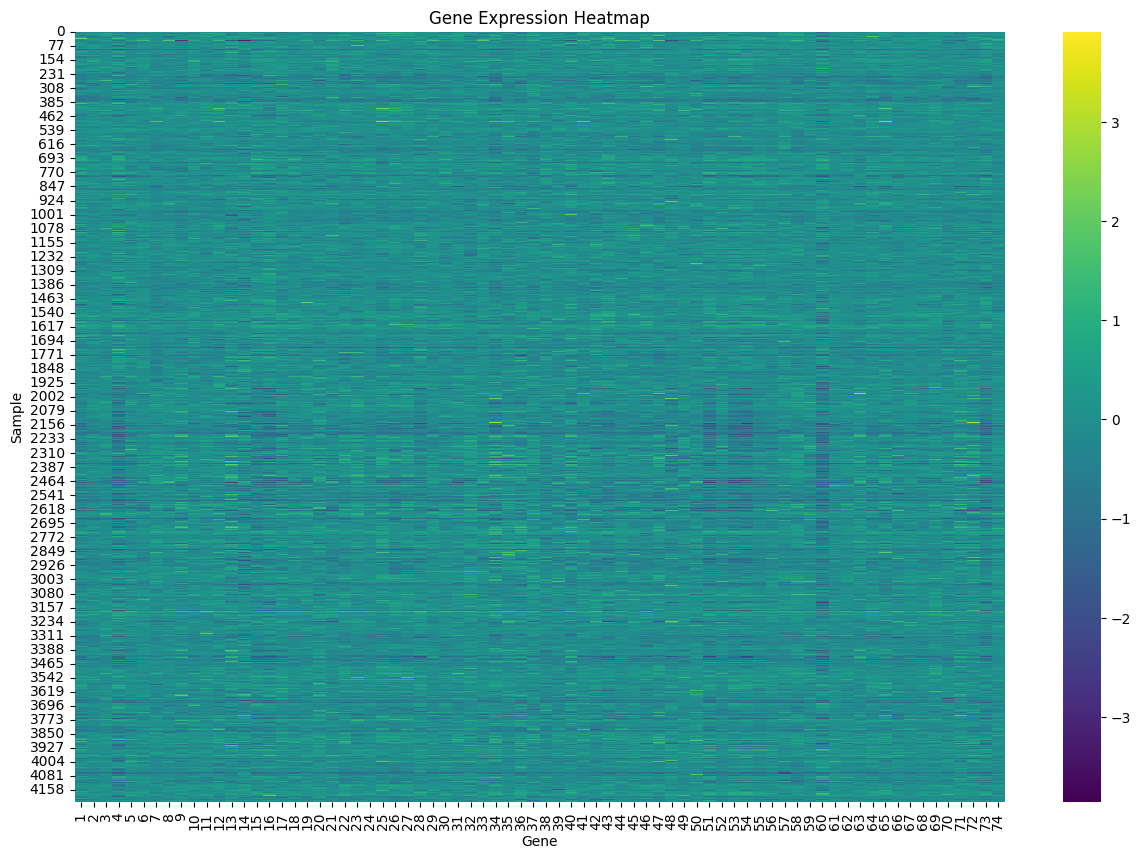

In [98]:
plt.figure(figsize=(15, 10))
sns.heatmap(genes, annot=False, xticklabels=range(1, 75), cmap='viridis')
plt.title("Gene Expression Heatmap")
plt.xlabel("Gene")
plt.ylabel("Sample")
plt.show()


Figure 1: Heatmap of the dataset, displaying a broad range of gene expression levels across different renal cell cancer (RCC) subtypes. Although the patterns in this heatmap are not distinctly informative for identifying specific trends or clusters, it serves as a comprehensive overview of the gene expression landscape in the dataset. The lack of clear differentiation in this visualization highlights the complexity and subtlety of gene expression variations in RCC, underscoring the need for more targeted analytical approaches.

# 2- Explore and preprocess the data.


## 2 a
missing values? (no)

In [9]:
np.where(genes.isna())

(array([], dtype=int64), array([], dtype=int64))

## 2 b
whiten it, normalize it, scale it: We are going to scale it.

In [10]:
scaledgenes = skl.preprocessing.scale(genes, axis=0)

In [11]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
         0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
        -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0., -0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
         0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0.,
        -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

We scale the gene expression data using skl.preprocessing.scale(genes, axis=0), which standardizes each gene (feature) to have a mean of 0 and a standard deviation of 1. This scaling is crucial for many data analysis and machine learning algorithms, as it ensures that each gene contributes equally to the analysis without being dominated by genes with larger magnitude or variance.

I choose not to whiten the data because the covariance between genes could be biologically significant. Whitening the data would remove these correlations, potentially obscuring important relationships between genes that are relevant to our study. In biological datasets, such as gene expression data, these correlations can indicate co-regulation or functional relationships between genes, which are essential for understanding the underlying biological processes.

Additionally, I opt out of separately normalizing the data (such as using min-max normalization to scale features to a range of 0 to 1) because our primary concern is not about the range of the data but rather about standardizing the variance across all features. Normalization in this context might not add additional value since our algorithms of interest, such as clustering and dimensionality reduction techniques, are typically more sensitive to the variance of features rather than their absolute scale.

# 3 Visualize the data


## a. t-SNE projection

In [12]:
# skl.manifold.TSNE?

(-49.3514310836792, 57.776590538024905, -42.36996021270752, 35.98253574371338)

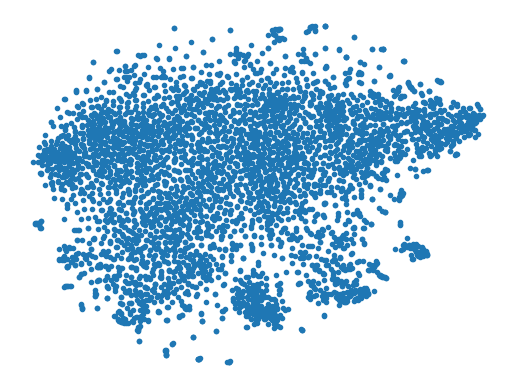

In [16]:
twodproj = skl.manifold.TSNE(perplexity=50).fit_transform(scaledgenes)
plt.plot(twodproj[:,0], twodproj[:,1], '.')
plt.axis('off');


Figure 2: t-SNE projection of the dataset, illustrating a scatter of points with subtle groupings that suggest variations in gene expression among different renal cell cancer (RCC) subtypes. This figure captures the complex nature of the data, where clusters are not distinctly separate but show tendencies of grouping, reflecting the nuanced differences in gene expression profiles. The visualization underscores the challenge in classifying RCC subtypes based on gene expression alone and highlights the potential need for more refined analytical techniques or additional data to achieve clearer segregation.

## b. UMAP 2D projection

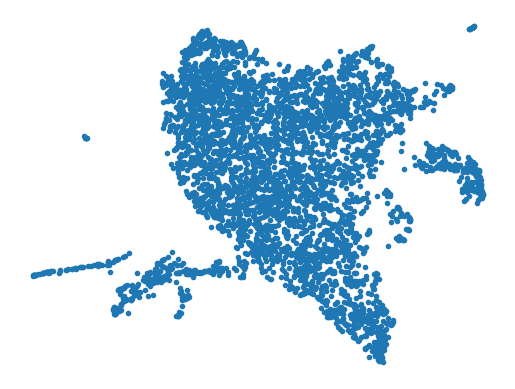

In [17]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean')
umap_proj = umap_model.fit_transform(scaledgenes)

plt.scatter(umap_proj[:, 0], umap_proj[:, 1], marker='.')
plt.axis('off')
plt.show()

Figure 3: UMAP projection of the same dataset, presenting a more defined clustering compared to the t-SNE projection in Figure 1. This improved separation indicates UMAP's effectiveness in capturing the intrinsic structure of the data, potentially offering better insights into the molecular distinctions among RCC subtypes. The contrast between this and the t-SNE projection underscores the importance of selecting appropriate dimensionality reduction techniques in genomic data analysis.

# 4. K-MEANS Clustering

## a. find the best number of culsters

first I define a function that measures the intracluster variance (the sum of the variance of each cluster
$V =\sum_J \sum_i{(X_{i\in j} - \bar{X_j})^2}$ for $i$ points in $j$ clusters )

In [18]:
def calICVar(X, labels):
    """
    Calculates the intracluster variance for a given set of data points and their corresponding cluster labels.

    The intracluster variance is a measure of the dispersion of the data points within each cluster.
    It is computed as the sum of the squared distances of each data point in a cluster from the mean of that cluster,
    aggregated across all clusters.

    Parameters:
    X (array-like): An NxM-dimensional array representing N observations with M features.
    labels (array-like): An N-dimensional vector of cluster labels for each observation in X.

    Returns:
    float: The total intracluster variance for the given clustering configuration.
    """
    icvar = 0
    for n in np.unique(labels):
        icvar += np.sum((X[labels == n] - X[labels == n].mean(axis=0))**2)
    return icvar


## Cluster with K-Means
 1 to 10 clusters, intracluster variance plot, look for an "elbow" in plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

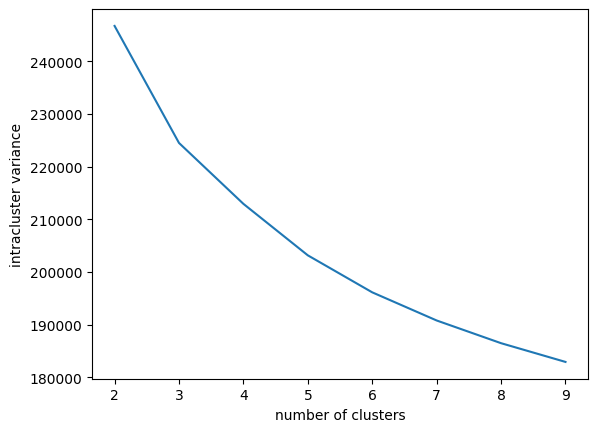

In [19]:
vars = [] # ICV
np.random.seed(42)
for i in range(2, 10):
    kmean = skl.cluster.k_means(scaledgenes, i)
    vars.append(calICVar(scaledgenes, kmean[1]))

plt.plot(range(2,10), vars)
plt.xlabel("number of clusters")
plt.ylabel("intracluster variance");


Figure 4: Elbow plot depicting the intra-cluster variance for different numbers of clusters, with a noticeable 'elbow' at n=3. This graph illustrates that dividing the dataset into three clusters significantly reduces within-cluster variance, suggesting an optimal clustering solution. The identification of the elbow at n=3 aligns with the known subtypes of renal cell cancer, reinforcing the biological relevance of this clustering approach in the analysis of gene expression data.

## 4b k-Means clustering with elbow number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


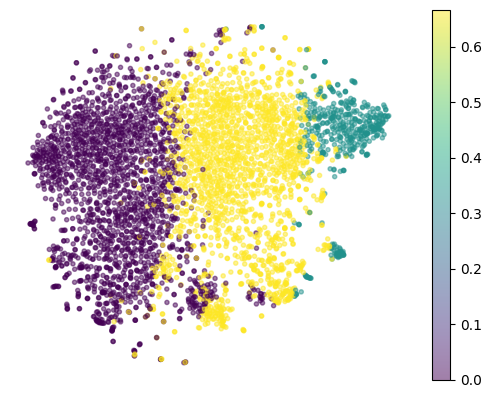

In [20]:
clusters = cluster.KMeans(n_clusters=3).fit(scaledgenes)

Figure 5: K-means clustering with n=3 overlayed on the t-SNE projection of the dataset, showing three distinct clusters. This visualization combines the dimensionality reduction of t-SNE with the clarity of K-means clustering, effectively grouping the data into three categories that correspond to the known subtypes of renal cell cancer. The overlay demonstrates how K-means clustering can enhance the interpretability of t-SNE plots in genomic datasets, particularly in distinguishing subtle yet significant patterns in gene expression.

## 4c t-SNY and UMAP projections colored by cluster

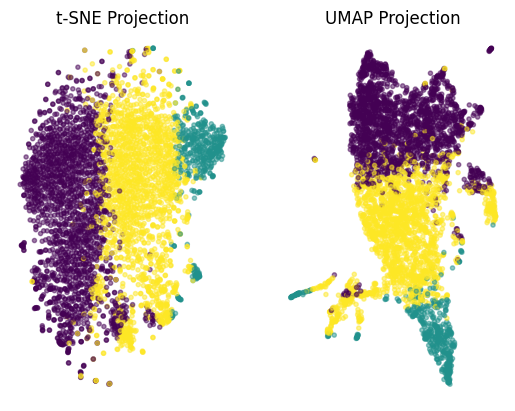

In [21]:
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(twodproj[:, 0], twodproj[:, 1], c=clusters.labels_, alpha=0.5, marker='.')
plt.title("t-SNE Projection")
plt.axis('off')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(umap_proj[:, 0], umap_proj[:, 1], c=clusters.labels_, alpha=0.5, marker='.')
plt.title("UMAP Projection")
plt.axis('off')

plt.show()

Figure 5: Side-by-side comparison of t-SNE and UMAP projections of the dataset, each overlaid with K-means clustering results for n=3 clusters. The left panel shows the t-SNE projection, where the clusters are somewhat intertwined, reflecting the complexity of the data. In contrast, the right panel displays the UMAP projection, where the three clusters are somwewhat more distinctly separated, indicating UMAP's enhanced ability to capture the underlying structure in high-dimensional gene expression data. This juxtaposition highlights the differences in how t-SNE and UMAP handle the same clustering task and their respective utilities in revealing data patterns.

# 5. DBSCAN Clustering


## 5a distribution of Euclidean distances

It is important to choose the hyperparamters of DBSCAN wisely. We initialize the _eps_ parameter of DBSCAN based on the mean Euclidean distance. To that end, we plot the Euclidean distance matrix of each point pairs.

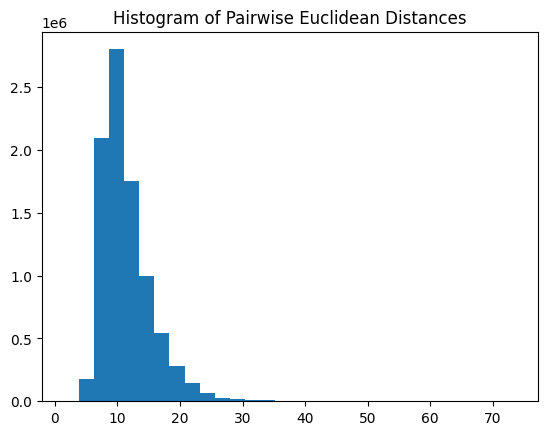

In [23]:
pairwise_dists = sp.spatial.distance.pdist(scaledgenes, 'euclidean')
mean_dist = np.mean(pairwise_dists)

plt.hist(pairwise_dists, bins=30)
plt.title("Histogram of Pairwise Euclidean Distances")
plt.show()


Figure 6: Histogram of the Euclidean distance matrix, representing the pairwise distances between data points, used to inform the initialization of the eps parameter for DBSCAN clustering. This plot highlights the distribution of distances within the dataset, with the mean distance providing a basis for selecting an appropriate eps value. The careful choice of DBSCAN hyperparameters, particularly eps, is crucial in accurately capturing the natural clusters in the dataset, as it directly influences the algorithm's ability to distinguish between noise and core points in the high-dimensional space of gene expression data.

## 5b Run DBSCAN

fit a dbscan model, plot tSNE projection colorcoded as before. How many clusters, how many outliers?

In [26]:
# skl.cluster.DBSCAN?

In [75]:
dbscan = skl.cluster.DBSCAN(eps=mean_dist/1.4, min_samples=4)
geneclustersDBS = dbscan.fit(scaledgenes)

unique_labels = np.unique(geneclustersDBS.labels_)

n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_outliers = list(geneclustersDBS.labels_).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of outliers: {n_outliers}")

Number of clusters: 3
Number of outliers: 140


140 outliers is not ideal but not terrible.

## 5c t-SNE and UMAP projections color-coded by DBSCAN cluster

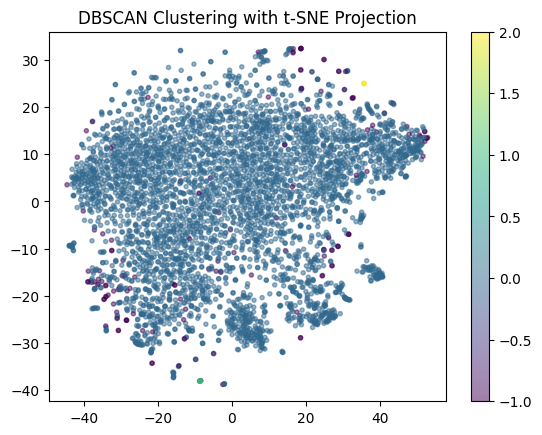

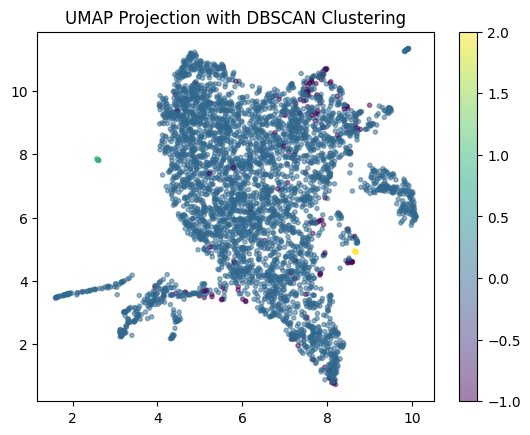

In [76]:
plt.scatter(twodproj[:, 0], twodproj[:, 1], c=geneclustersDBS.labels_, alpha=0.5, marker='.')
plt.title("DBSCAN Clustering with t-SNE Projection")
plt.colorbar()
plt.show()
plt.scatter(umap_proj[:, 0], umap_proj[:, 1], c=geneclustersDBS.labels_, alpha=0.5, marker='.')
plt.title("UMAP Projection with DBSCAN Clustering")
plt.colorbar()
plt.show()


Figure 7: Overlay of DBSCAN results on t-SNE and UMAP projections, using an eps value of mean distance/1.4 and a minimum neighbors setting of 4, resulting in the identification of three clusters and 140 outliers. Despite the theoretical segmentation into three clusters, the visual representation in both t-SNE and UMAP projections does not exhibit clear or distinct clustering patterns. This outcome highlights the challenges in translating high-dimensional gene expression data into informative 2D visualizations, particularly when using DBSCAN, which can be sensitive to parameter settings and the complexity of the data structure. The significant number of outliers and the lack of apparent clusters underscore the limitations of this approach for this specific dataset.

# 6 Agglomerative clustering


## 6a agglomerative clustering with standard distance choices: ward linkage and Euclidean distance

In [32]:
clusteringAg = skl.cluster.AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusteringAg.fit(scaledgenes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

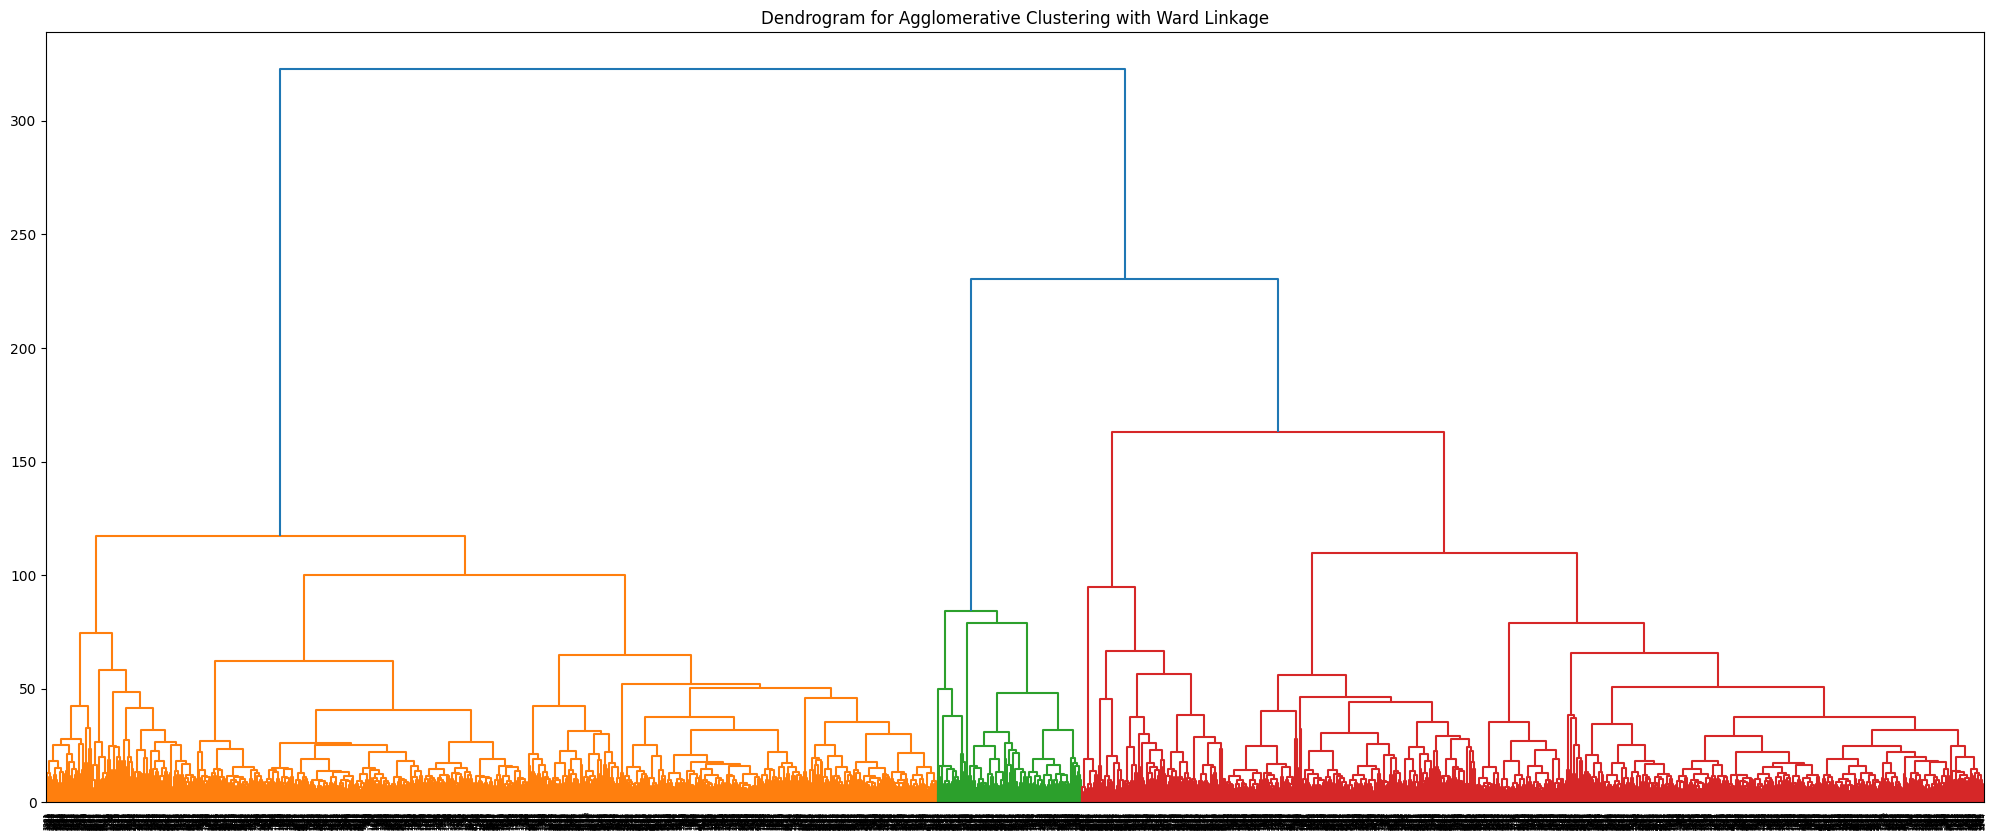

In [33]:
Z = linkage(scaledgenes, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering with Ward Linkage')
plt.show()

Figure 8: Dendrogram resulting from agglomerative clustering using Ward linkage and Euclidean distance and five distinct clusters. This hierarchical clustering approach reveals a nuanced structure within the dataset, where the dendrogram branches suggest a natural division into five groups. The choice of Ward linkage, which minimizes variance within clusters, combined with Euclidean distance, is effective in illustrating the hierarchical relationships in the data, offering insights that might not be evident in non-hierarchical clustering methods.

Now we repeat with a different linkage and comment on differences

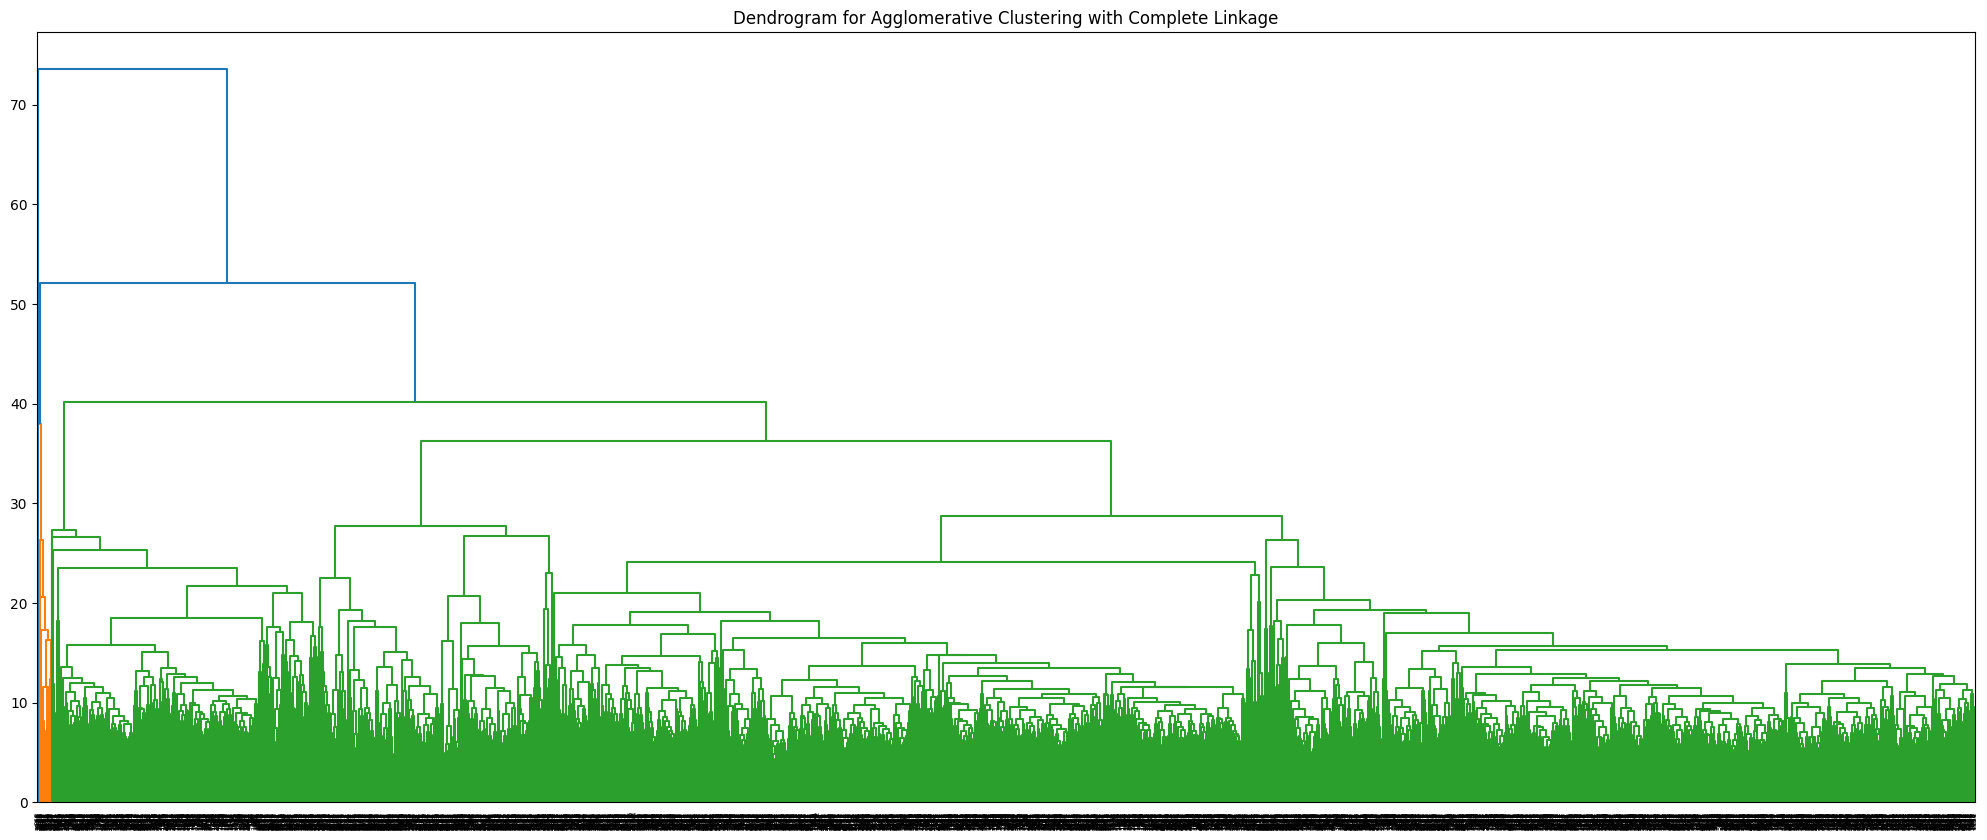

In [34]:
Z_complete = linkage(scaledgenes, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_complete)
plt.title('Dendrogram for Agglomerative Clustering with Complete Linkage')
plt.show()


Figure 9: Dendrogram from agglomerative clustering using complete linkage and Euclidean distance, partitioned into five clusters. In contrast to the Ward linkage method, the complete linkage results in a less evenly distributed clustering, with one cluster dominating in size. This illustrates the impact of the choice of linkage criteria on the outcome of hierarchical clustering: while Ward linkage minimizes within-cluster variance, complete linkage focuses on maximizing dissimilarities between clusters, leading to one significantly larger cluster and smaller, more distinct groups. This variation in clustering patterns underscores the importance of selecting appropriate linkage methods based on the specific characteristics and objectives of the analysis.

# 6b agglomerative clustering with "ideal" number of clusters as decided by elbow plot


In [35]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
geneclustersAg.fit(scaledgenes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [36]:
geneclustersAg.labels_

array([0, 0, 0, ..., 1, 0, 0])

## 6c tSNE colorcoded

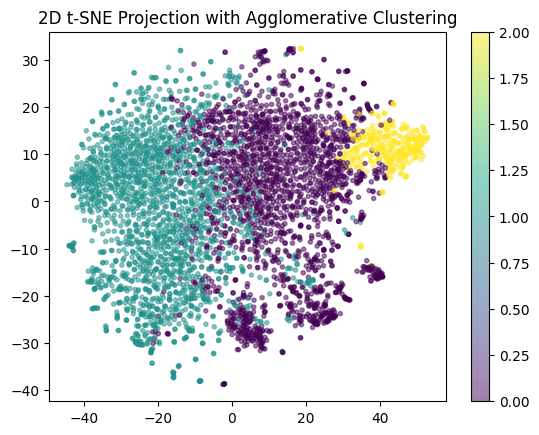

In [37]:
cluster_labels = geneclustersAg.labels_
plt.scatter(twodproj[:, 0], twodproj[:, 1], c=cluster_labels, alpha=0.5, marker='.')
plt.title("2D t-SNE Projection with Agglomerative Clustering")
plt.colorbar()
plt.show()


Figure 10: t-SNE projection of the dataset, color-coded to represent the results of agglomerative clustering with an ideal number of three clusters, using Ward linkage and Euclidean distance. This visualization effectively maps the complex, high-dimensional gene expression data onto a 2D space, where the three clusters are distinguished by distinct colors, reflecting the underlying subtypes in the renal cell cancer (RCC) dataset. The alignment of the t-SNE projection with the agglomerative clustering results highlights the compatibility of these methods in identifying and visualizing meaningful patterns and groupings within the data, particularly when the number of clusters is chosen to align with known biological classifications.

# 7  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC187526

which was the most "useful" method for clustering

Among the evaluated methods, UMAP with K-means (n=3) and Agglomerative Clustering with t-SNE (Ideal Clusters) emerged as the most useful for this dataset. UMAP combined with K-means offered clear, well-separated clusters, aligning well with the known RCC subtypes. Agglomerative Clustering, particularly when visualized with t-SNE, provided meaningful groupings that closely corresponded to biological classifications. These methods stood out in their ability to translate high-dimensional gene expression data into biologically informative clusters.






